# COSC 757 - Group Project - UFO

In this project we will take a look at a data set representing UFO sightings around the world. We will try to determine if there is a relationship between a UFO sightings’ location and shape through regression analysis.


## Data Preprocessing

In [31]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#reading csv file into data frame
df = pd.read_csv('/Users/fsaintamour/Documents/School/UFO/ufo.csv')
pd.options.display.max_rows = 90000 # setting pandas option
#print headers
print "ufo - header"
print df.head()

print
#get info and identify missing values
print "ufo - Summary"
print df.info()

ufo - header
          Date_time                  city state/province country UFO_shape  \
0  10/10/1949 20:30            san marcos             tx      us  cylinder   
1  10/10/1949 21:00          lackland afb             tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)            NaN      gb    circle   
3  10/10/1956 21:00                  edna             tx      us    circle   
4  10/10/1960 20:00               kaneohe             hi      us     light   

  length_of_encounter_seconds described_duration_of_encounter  \
0                        2700                      45 minutes   
1                        7200                         1-2 hrs   
2                          20                      20 seconds   
3                          20                        1/2 hour   
4                         900                      15 minutes   

                                         description date_documented  \
0  This event took place in early fall around 194...   

From the above we can see that the count for city, country, data_time, etc... is 80332 but for state/province, ufo_shape and description we have a lower number. This is an indication that some data is missing for these fields.

Since the aim of our analysis is to see if there is a relation between location and ufo_shape we can drop some of the other columns...

In [33]:
#replacing empty ufo_shape with 'other'
df.loc[df['UFO_shape'] == "", 'UFO_shape'] = "other"

#replacing ? and ?? with NaN
df.loc[df['city'] == "?", 'city'] = np.NaN
df.loc[df['city'] == "??", 'city'] = np.NaN

#dropping some columns
df.drop('Date_time',axis=1, inplace=True)
df.drop('length_of_encounter_seconds',axis=1, inplace=True)
df.drop('described_duration_of_encounter',axis=1, inplace=True)
df.drop('date_documented',axis=1, inplace=True)

#drop all other NaN values
df.dropna(inplace=True)
print "ufo - Summary"
print df.info()

ufo - Summary
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 0 to 80331
Data columns (total 7 columns):
city              66516 non-null object
state/province    66516 non-null object
country           66516 non-null object
UFO_shape         66516 non-null object
description       66516 non-null object
latitude          66516 non-null object
longitude         66516 non-null float64
dtypes: float64(1), object(6)
memory usage: 4.1+ MB
None


After removing NaN values our data set was reduced from 80332 records to 72731

## EDA

We will start the EDA process by graphing the relevant columns (ufo_shape, state/province, country, city) of our data

Bar graph of ufo_shape


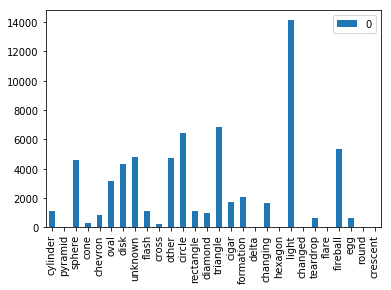

In [34]:
print "Bar graph of ufo_shape"
counts = Counter(df['UFO_shape'])
df_hist = pd.DataFrame.from_dict(counts, orient='index')
df_hist.plot(kind='bar')

In [35]:
# since there are too many entries. graphing city take too long
# instead let's print out the values
city = df['city']
city = city.sort_values(ascending=True)
print "City..."
print city #city in ascending order

City...
10678                                            abbeville
62220                                            abbeville
63939                                            abbeville
14949                                            abbeville
17057                                            abbeville
34434                                            abbeville
16858                           abbeville (lake secession)
43704                                  abbotsford (canada)
27903                                  abbotsford (canada)
4844                                   abbotsford (canada)
13020                                  abbotsford (canada)
67354                                  abbotsford (canada)
14889                                  abbotsford (canada)
19180                                  abbotsford (canada)
12497                                  abbotsford (canada)
36889                                  abbotsford (canada)
59667                                  abbotsfor

From the above print out of city

72068                                  chicago (&#39burbs)  
21853                   chicago (1 hours south ofoff i 57)  
4954                             chicago (1/2 hour out of)  
43664     chicago (about 50 miles south of&#44 i-55 south)  
1517                 chicago (downtown&#44 on l. michigan)  
53446                                   chicago (downtown)  
59259                                    chicago (east of)  

we can see that city can also refer too specific parts of a city (which is why there are so many entries)
Because of that we will focus on state/province, country & ufo_shape for out analysis

Bar graph of country


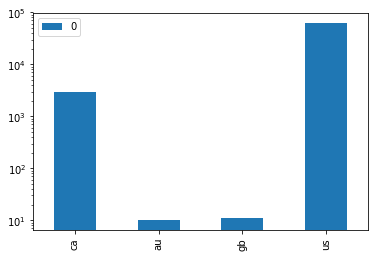

In [36]:
print "Bar graph of country"
counts = Counter(df['country'])
df_hist = pd.DataFrame.from_dict(counts, orient='index')
df_hist.plot(kind='bar', logy=True)

Bar graph of state/province


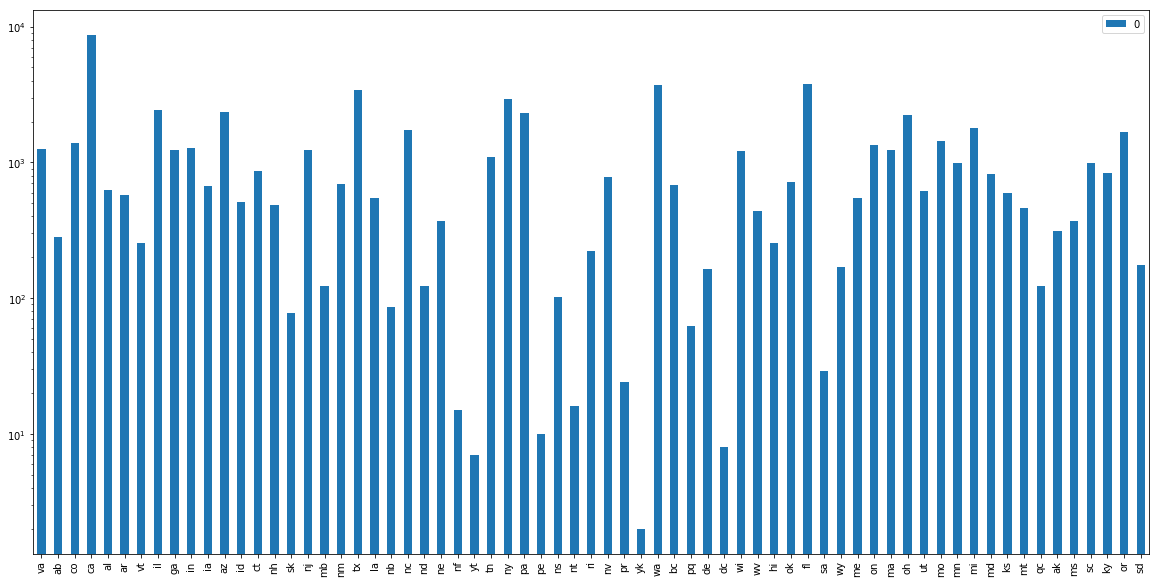

In [37]:
print "Bar graph of state/province"
counts = Counter(df['state/province'])
df_hist = pd.DataFrame.from_dict(counts, orient='index')
df_hist.plot(kind='bar', logy=True, figsize=(20, 10))

## Regression Analysis